In [1]:
from proximitylib import *

font = {'family' : 'sans-serif',
        'weight' : 'normal',
        'size'   : 14}

mpl.rc('font', **font)
mpl.rcParams['figure.figsize'] = 6,3.6
mpl.rcParams['figure.facecolor'] = "w"

//anaconda3/lib/python3.7/site-packages/numpy/core/numeric.py:538: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


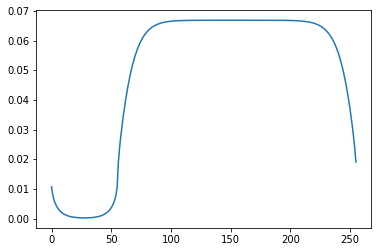

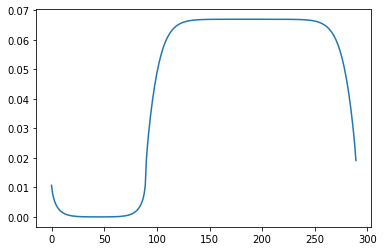

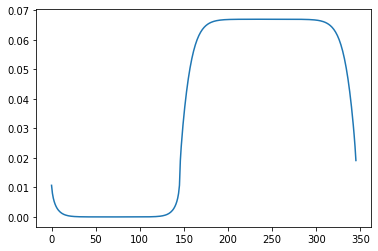

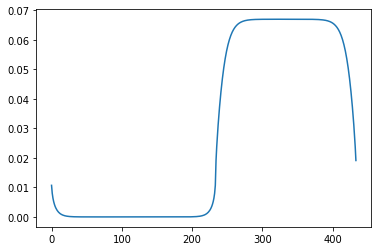

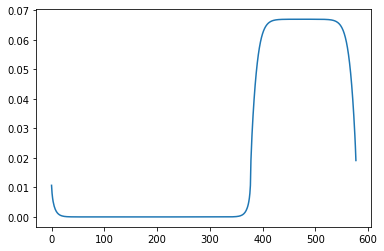

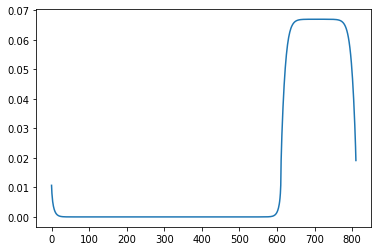

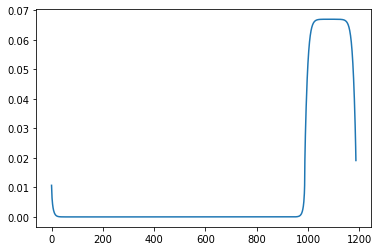

In [4]:
############ Finite size scaling for the periodic case
Deltas = {}
Delta_mids = []
Lengths = [55, 89, 144, 233, 377, 610, 987]
beta = 20
for L in Lengths:
    chain = hybrid_ring (chain1D(L), chain1D(199,u = 0.75, v=-1.5), t_int = -1, beta = beta)
    plt.plot(chain.Delta)
    plt.show()
    Delta_mids.append(chain.Delta[(L+1)//2])
    Deltas[(beta,L)] = chain.Delta
#plt.plot(Lengths, Delta_mids,".")

temp = scaling(np.array(Lengths)/2, np.array(Delta_mids))

# temp.fit_to_pow()
# temp.fit_to_exp()
# temp.fit_to_expstr()

In [7]:
temp = {**Deltas, **comp_per}
comp_per = temp

In [8]:
pickle.dump(comp_per,open("comp_per.p","wb"))

In [3]:
# comp_per = pickle.load(open("comp_per.p","rb"))

In [7]:
# pickle.dump((np.array(Lengths)/2, np.array(Delta_mids)),open("perB20ScalingObj.p","wb"))

In [2]:
Ls, Fs = pickle.load(open("perB20ScalingObj.p", "rb"))

/Users/gautam/Dropbox/Notebooks/proximitylib.py:422: RuntimeWarning: invalid value encountered in log
  scaling_fit = mod.fit(np.log(self.Fs)[:self.Len-rem] ,pars, x=self.Ls[:self.Len-rem])


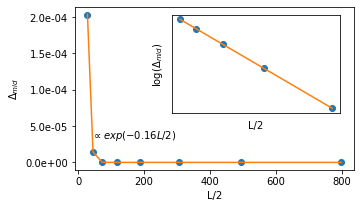

In [3]:
temp = scaling(Ls, Fs)
temp.fit_to_exp(rem = 3)


100%|██████████| 50/50 [47:09<00:00, 54.35s/it]

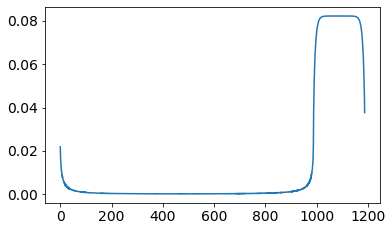

In [95]:
############ Finite size scaling for the disordered case
L = 987
N_trials = 50

Deltas = np.ones(L+1+200)
for _ in tqdm(range(N_trials)):
    chain = hybrid_ring (chain1D(L, wt =0.2), chain1D(199,u = 0.75,v=-1.5), t_int = -1, beta = 2000)
    Deltas *= np.real(chain.Delta)
    #plt.plot(chain.Delta)

Delta_avg = np.power(Deltas, 1/N_trials)

plt.plot(Delta_avg)


In [96]:
Delta_avgs.append(Delta_avg)
Lengths.append(L)

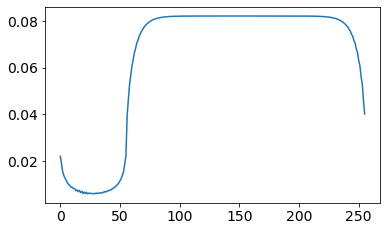

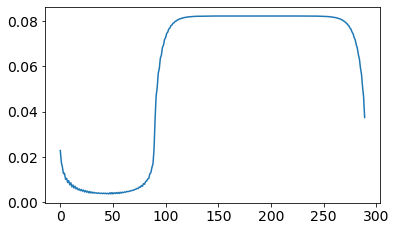

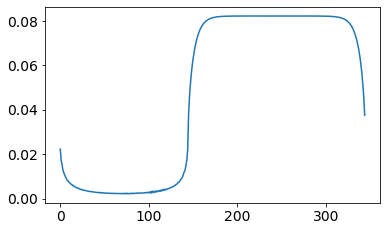

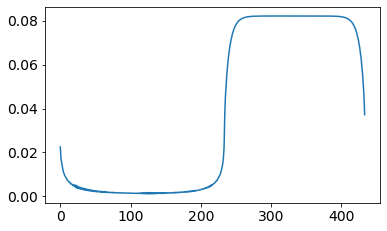

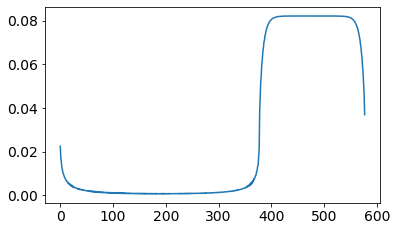

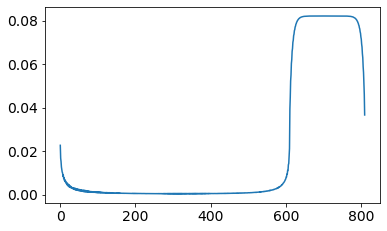

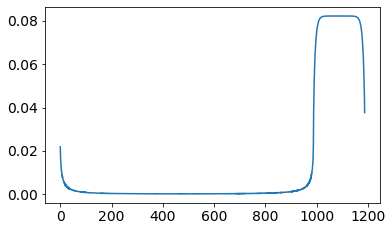

In [97]:
Delta_mids = []
for L, Delta_avg in zip(Lengths, Delta_avgs):
    plt.plot(Delta_avg)
    plt.show()
    Delta_mids.append(Delta_avg[(L+1)//2])
    

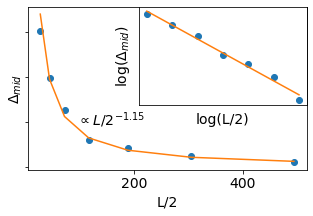

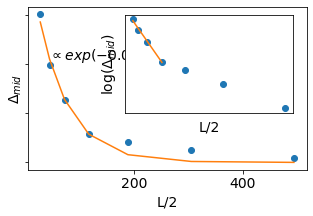

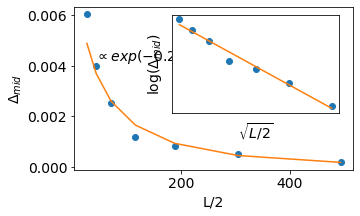

In [98]:
temp = scaling(np.array(Lengths)[:]/2, np.array(Delta_mids)[:])

temp.fit_to_pow()
temp.fit_to_exp()
temp.fit_to_expstr()

In [ ]:
# ############### Fit benchmarking
# for w, N_trials in zip([0.8],[50]):
#     Deltas = []
#     for _ in range(N_trials):
#         chain = hybrid_ring(chain1D(688, w = w), chain1D(89,u = 0.75, v=-1.5), t_int = -1)
#         Deltas.append(chain.Delta)
#     Delta_avg = np.power(np.product(Deltas, axis = 0),1/N_trials)
#     Delta_w = Delta_profile(Delta_avg, chain.NN, chain.NS)
#     #plt.plot(Delta_avg)
#     res_powerlaw, res_exp, res_expstr = Delta_w.gen_fits()
#     Delta_w.benchmark_fits()


In [ ]:
##############LDOS chatter

LDOSs, eex = chain.get_LDOS(gam = 0.04, Num_es = 2000)

In [ ]:
l = 800
r = 1200

L_e =len(eex) 

for x, LDOS in zip(np.arange(chain.LL)[-5::], LDOSs[-5::]):
    plt.plot(eex[l:r], LDOS[l:r], label = "x = {}".format(x -chain.LL))
    plt.legend()
plt.show()
    
for x, LDOS in zip(np.arange(chain.LL)[1:9:2], LDOSs[1:9:2]):
    plt.plot(eex[l:r], LDOS[l:r], label = "x = {}".format(x))
    plt.legend()
plt.show()

for x, LDOS in zip(np.arange(chain.LL)[:9:2], LDOSs[:9:2]):
    plt.plot(eex[l:r], LDOS[l:r], label = "x = {}".format(x))
    plt.legend()
plt.show()

for x, LDOS in zip(np.arange(chain.LL)[9:19:2], LDOSs[9:19:2]):
    plt.plot(eex[l:r], LDOS[l:r], label = "x = {}".format(x))
    plt.legend()
plt.show()

for x, LDOS in zip(np.arange(chain.LL)[19:29:2], LDOSs[19:29:2]):
    plt.plot(eex[l:r], LDOS[l:r], label = "x = {}".format(x))
    plt.legend()
plt.show()

for x, LDOS in zip(np.arange(chain.LL)[29:39:2], LDOSs[29:39:2]):
    plt.plot(eex[l:r], LDOS[l:r], label = "x = {}".format(x))
    plt.legend()
plt.show()

for x, LDOS in zip(np.arange(chain.LL)[39:49:2], LDOSs[39:49:2]):
    plt.plot(eex[l:r], LDOS[l:r], label = "x = {}".format(x))
    plt.legend()
plt.show()
    
for x, LDOS in zip(np.arange(chain.LL)[49:59:2], LDOSs[49:59:2]):
    plt.plot(eex[l:r], LDOS[l:r], label = "x = {}".format(x))
    plt.legend()
plt.show()

# for x, LDOS in zip(np.arange(chain.LL)[45:55:2], LDOSs[45:55:2]):
#     plt.plot(eex[900:1100], LDOS[900:1100], label = "x = {}".format(x))
#     plt.legend()
# plt.show()


In [ ]:
E_g = []
xs = np.arange(9, 45, 2)
for x, LDOS in zip(np.arange(chain.LL)[xs], LDOSs[xs]):
    eex_sub = eex[1000:1060]
    LDOS_sub = LDOS[1000:1060]
    plt.plot(eex_sub, LDOS_sub, label = "x = {}".format(x))
    plt.legend()
    E_g.append(eex_sub[np.argmax(LDOS_sub)])
#     xs.append(x)
plt.show()
plt.plot(xs, E_g, "o")
plt.show()

xs = np.arange(45, 109, 2)
for x, LDOS in zip(np.arange(chain.LL)[xs], LDOSs[xs]):
    eex_sub = eex[1000:1025]
    LDOS_sub = LDOS[1000:1025]
    plt.plot(eex_sub, LDOS_sub, label = "x = {}".format(x))
    plt.legend()
    E_g.append(eex_sub[np.argmax(LDOS_sub)])
#     xs.append(x)
plt.show()

xs = np.arange(9,109,2)
plt.plot(xs, E_g, "o")
plt.show()



# E_g = []
# xs = np.arange(109, 119, 2)
# for x, LDOS in zip(np.arange(chain.LL)[xs], LDOSs[xs]):
#     eex_sub = eex[1000:1012]
#     LDOS_sub = LDOS[1000:1012]
#     plt.plot(eex_sub, LDOS_sub, label = "x = {}".format(x))
#     plt.legend()
#     E_g.append(eex_sub[np.argmax(LDOS_sub)])
# #     xs.append(x)
# plt.show()
# plt.plot(xs, E_g, "o")
# plt.show()

In [ ]:
temp = scaling(np.array(xs), np.array(E_g), L_label = "x", F_label = "$\epsilon_{peak}$")

temp.fit_to_pow()
temp.fit_to_exp()

In [1]:
data0005 = pickle.load(open("dis890005.p", "rb"))

NameError: name 'pickle' is not defined

In [22]:
ws = [0.005,0.01,0.02,0.05,0.1,0.2,0.3,0.4]
datas = [data0005, data001, data002, data005, data01,data02,data03,data04]
from scipy import stats

statts = [stats.describe(data) for data in datas]

Text(0.5, 1.0, 'Statistics of $\\Delta_{mid}$ vs disorder strength')

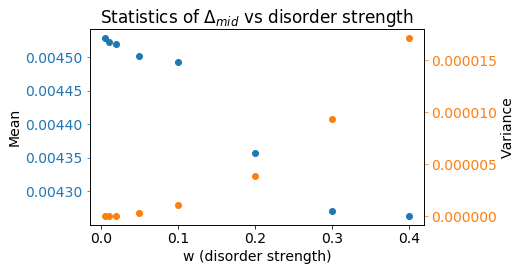

In [39]:
fig, ax1 = plt.subplots()

ax1.plot(list(ws),[stat.mean for stat in statts],"C0o")

ax2 = ax1.twinx()
ax2.plot(list(ws),[stat.variance for stat in statts],"C1o")


ax1.set_xlabel("w (disorder strength)")

ax1.tick_params(axis='y', colors='C0')
ax2.tick_params(axis='y', colors='C1')
ax1.set_ylabel("Mean")
ax2.set_ylabel("Variance")

ax2.set_title("Statistics of $\Delta_{mid}$ vs disorder strength")


In [13]:
comp_dis = pickle.load(open("comp_dis.p","rb"))
[print(key) for key in comp_dis.keys()]

(89, 0.15)
(89, 0.25)
(144, 0.25)
(233, 0.25)
(377, 0.25)
(55, 0.25)
(89, 0.2)
(89, 0.1)
(89, 0.05)
(89, 0.3)
(144, 0.05)
(233, 0.05)
(377, 0.05)
(55, 0.05)


[None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None]

In [12]:
comp_FC = pickle.load(open("comp_FC.p","rb"))
[print(key) for key in comp_FC.keys()]

(89, 0.1)
(89, 0.05)
(89, 0.2)
(89, 0.15)
(89, 0.3)
(144, 0.05)
(144, 0.1)
(144, 0.2)
(144, 0.3)
(144, 0.01)
(233, 0.1)
(233, 0.2)
(233, 0.3)
(233, 0.15)
(233, 0.25)
(89, 0.25)


[None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None]

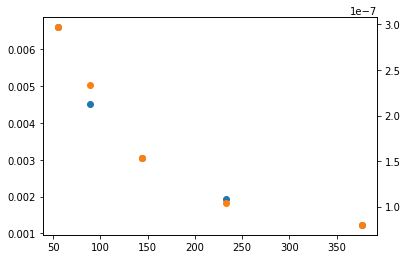

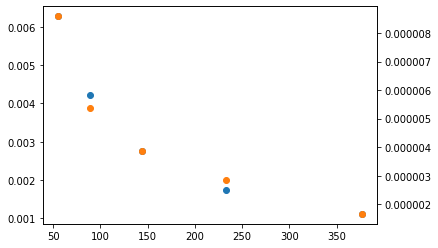

In [10]:
ww = 0.05
Delta_mids = {}
Stats = {}
for (l, w),Deltas in comp_dis.items():
    if w==ww:
        Delta_mids[l] = [Delta[l//2] for Delta in Deltas]
        Stats[l] = stats.describe(Delta_mids[l])
        
ls = [l for l in sorted(Stats.keys())]

fig, ax1 = plt.subplots()
ax1.plot(ls,[Stats[l].mean for l in ls], "C0o")
ax2 = ax1.twinx()
ax2.plot(ls,[Stats[l].variance for l in ls], "C1o")



ww = 0.25
Delta_mids = {}
Stats = {}
for (l, w),Deltas in comp_dis.items():
    if w==ww:
        Delta_mids[l] = [Delta[l//2] for Delta in Deltas]
        Stats[l] = stats.describe(Delta_mids[l])
        
ls = [l for l in sorted(Stats.keys())]

fig, ax1 = plt.subplots()
ax1.plot(ls,[Stats[l].mean for l in ls], "C0o")
ax2 = ax1.twinx()
ax2.plot(ls,[Stats[l].variance for l in ls], "C1o")

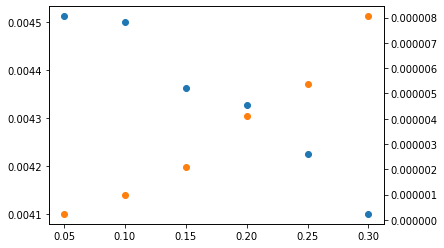

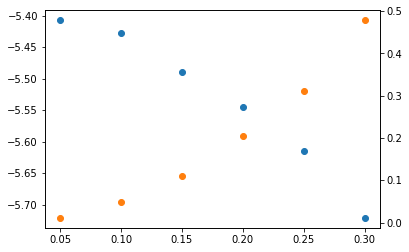

In [14]:
ll = 89
Delta_mids = {}
Stats = {}
Stats_log = {}
for (l, w),Deltas in comp_dis.items():
    if l==ll:
        Delta_mids[w] = [Delta[l//2] for Delta in Deltas]
        Stats[w] = stats.describe(Delta_mids[w])
        Stats_log[w] = stats.describe(np.log(Delta_mids[w]))
        
ws = [w for w in sorted(Stats.keys())]

fig, ax1 = plt.subplots()
ax1.plot(ws,[Stats[w].mean for w in ws], "C0o")
ax2 = ax1.twinx()
ax2.plot(ws,[Stats[w].variance for w in ws], "C1o")

fig, ax1 = plt.subplots()
ax1.plot(ws,[Stats_log[w].mean for w in ws], "C0o")
ax2 = ax1.twinx()
ax2.plot(ws,[Stats_log[w].variance for w in ws], "C1o")